In [110]:
import pandas as pd

df = pd.read_csv('https://github.com/yarathealmighty/dumps/blob/main/data/not_na_tags/latin_374_w2v.csv?raw=true')
df

,Id,Tags,Question,Answer,Cosine Similarity (CBOW),Cosine Similarity (Skip-gram),Question_Vector
0,1,"['classical-latin', 'meaning', 'vocabulary', '...","Are ""-que"" and ""et"" equivalent? I was taught t...","The way I was taught was that, as a general r...",0.376483,0.533986,[ 4.10459399e-01 -2.38088086e-01 1.42925978e-...
1,2,"['contemporary-latin', 'pronouns', 'articles',...","Why is ""ille"" used in Winnie ille Pu and Hobbi...","It's true that in Classical Latin, ille is a ...",0.336087,0.566115,[ 3.84361714e-01 -2.60509640e-01 1.56550348e-...
2,4,"['agreement', 'predicate', 'gender', 'adjectiv...",What gender should a predicate adjective be to...,Bennett's New Latin Grammar ( this link will ...,0.387429,0.567729,[ 3.58468920e-01 -3.02436620e-01 1.09872311e-...
3,5,['pronunciation'],What effect should a macron have on the sound ...,"In most modern texts, the whole purpose of us...",0.472779,0.607277,[ 0.42342234 -0.21060595 0.13680652 0.528650...
4,7,"['etymology', 'particle', 'hebrew']","Does ""ad"" have its origin in Hebrew/Semitic la...","No, the similarity is almost certainly accide...",0.368243,0.542787,[ 0.40219393 -0.2743029 0.16766459 0.407630...
...,...,...,...,...,...,...,...
5879,23416,"['english-to-latin-translation', 'classical-la...","Can someone help translating ""one must die for...",One possibility: necesse est alterum mori ut ...,0.414603,0.562434,[ 4.15150702e-01 -3.83984089e-01 2.82603055e-...
5880,23420,['english-to-latin-translation'],Four more loaves please This new question: How...,"In Nicholas Oulton's Book II, p.50: ""plures c...",0.352794,0.520526,[ 0.44922554 -0.34840554 0.23837692 0.473246...
5881,23425,"['latin-to-english-translation', 'mathematics']","Mathematical Latin Help So, I'm a PhD student ...","I understand ""ut quotiens sit integer complex...",0.394950,0.557162,[ 0.33285397 -0.23168108 0.12974669 0.373364...
5882,23429,"['latin-to-english-translation', 'translation-...",Does “interranima” mean “inner soul”? I came a...,"No. Anima is the Latin word for soul, apart f...",0.334330,0.523648,[ 4.86243784e-01 -4.32804465e-01 1.45411789e-...


In [111]:
import torch

vectors = []
for i in range(0,len(df)):
  vector = df['Question_Vector'][i][1:-1].split()
  new_vector = []
  for value in vector:
    value = float(value)
    new_vector.append(value)
  vectors.append(new_vector)

df['Question_Vector'] = vectors
df

,Id,Tags,Question,Answer,Cosine Similarity (CBOW),Cosine Similarity (Skip-gram),Question_Vector
0,1,"['classical-latin', 'meaning', 'vocabulary', '...","Are ""-que"" and ""et"" equivalent? I was taught t...","The way I was taught was that, as a general r...",0.376483,0.533986,"[0.410459399, -0.238088086, 0.142925978, 0.609..."
1,2,"['contemporary-latin', 'pronouns', 'articles',...","Why is ""ille"" used in Winnie ille Pu and Hobbi...","It's true that in Classical Latin, ille is a ...",0.336087,0.566115,"[0.384361714, -0.26050964, 0.156550348, 0.4222..."
2,4,"['agreement', 'predicate', 'gender', 'adjectiv...",What gender should a predicate adjective be to...,Bennett's New Latin Grammar ( this link will ...,0.387429,0.567729,"[0.35846892, -0.30243662, 0.109872311, 0.48757..."
3,5,['pronunciation'],What effect should a macron have on the sound ...,"In most modern texts, the whole purpose of us...",0.472779,0.607277,"[0.42342234, -0.21060595, 0.13680652, 0.528650..."
4,7,"['etymology', 'particle', 'hebrew']","Does ""ad"" have its origin in Hebrew/Semitic la...","No, the similarity is almost certainly accide...",0.368243,0.542787,"[0.40219393, -0.2743029, 0.16766459, 0.4076303..."
...,...,...,...,...,...,...,...
5879,23416,"['english-to-latin-translation', 'classical-la...","Can someone help translating ""one must die for...",One possibility: necesse est alterum mori ut ...,0.414603,0.562434,"[0.415150702, -0.383984089, 0.0282603055, 0.50..."
5880,23420,['english-to-latin-translation'],Four more loaves please This new question: How...,"In Nicholas Oulton's Book II, p.50: ""plures c...",0.352794,0.520526,"[0.44922554, -0.34840554, 0.23837692, 0.473246..."
5881,23425,"['latin-to-english-translation', 'mathematics']","Mathematical Latin Help So, I'm a PhD student ...","I understand ""ut quotiens sit integer complex...",0.394950,0.557162,"[0.33285397, -0.23168108, 0.12974669, 0.373364..."
5882,23429,"['latin-to-english-translation', 'translation-...",Does “interranima” mean “inner soul”? I came a...,"No. Anima is the Latin word for soul, apart f...",0.334330,0.523648,"[0.486243784, -0.432804465, 0.145411789, 0.460..."


In [112]:
def get_unique_tags(df):
  tags_list = df['Tags']
  unique_tags = set([])
  for tags in tags_list:
    tags = tags.split("'")[1:-1:2]
    for tag in tags:
      unique_tags.add(tag)
  return list(unique_tags)

In [113]:
vectors = df['Question_Vector']
tensors = [torch.tensor(vector, dtype=torch.float32) for vector in vectors]

n_letters = len(tensors[0])

categories = get_unique_tags(df)
n_categories = len(categories)

In [114]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [115]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

tokenized_questions = [simple_preprocess(q) for q in df['Question']]

model = Word2Vec(sentences=tokenized_questions, vector_size=374, window=5, min_count=1, workers=4)

def get_vector(question, model):
    tokens = simple_preprocess(question)
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

def questionToTensor(question):
    vector = get_vector(question,model)
    tensor = torch.tensor(vector, dtype=torch.float32)
    return tensor

In [116]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return categories[category_i], category_i

print(categoryFromOutput(output))

('nuntii-latini', 107)


In [117]:
#TODO question to tensor func
input = tensors
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[9], hidden)
print(output)

tensor([[-5.8413, -5.9835, -6.0108, -5.8066, -5.8921, -5.9565, -5.8249, -5.9399,
         -6.0567, -5.9488, -5.9573, -5.9666, -5.9560, -6.0628, -5.7845, -6.0023,
         -5.9621, -5.8304, -6.0140, -5.9866, -5.7521, -5.8255, -5.8610, -6.0140,
         -5.9659, -5.6526, -5.8720, -5.8145, -5.8502, -5.8229, -5.9412, -6.1239,
         -5.9111, -5.9148, -6.0907, -5.6866, -5.9418, -5.8324, -5.8209, -5.9592,
         -5.8748, -6.0053, -6.1678, -6.1583, -6.0767, -5.9618, -5.8900, -5.9766,
         -5.8754, -6.1092, -5.9827, -5.9578, -6.0271, -5.8936, -6.0460, -5.8170,
         -5.9641, -6.0314, -6.0037, -5.8129, -5.8868, -5.8981, -5.9610, -5.9415,
         -6.0928, -5.8758, -5.9464, -5.9374, -5.8713, -5.7994, -5.9895, -5.9891,
         -5.6927, -6.0393, -6.0867, -6.1078, -5.9960, -6.1239, -5.8282, -5.8927,
         -6.0112, -5.8934, -5.8911, -5.8515, -5.9774, -5.8704, -5.7139, -5.8510,
         -6.0216, -5.9843, -5.8218, -6.1719, -5.9829, -5.8846, -6.0078, -5.6795,
         -6.2274, -5.8619, -

In [118]:
tagged_questions = {}
for tag in categories:
    tagged_questions[tag] = df[df['Tags'].apply(lambda tags: tag in tags)]['Question'].tolist()

print(tagged_questions['meaning'])

['Are "-que" and "et" equivalent? I was taught that one can use the \'-que\' suffix to string together multiple words, in a similar way to putting \'et\' between them. Are these two equivalent? Did one have a connotation in classical (Caesar-era) Latin that the other didn\'t?', 'What\'s the difference between vel, aut, -ve, et cetera? So I see "vel", "aut", and "-ve" being used (mostly) interchangeably in the Latin I read. Is there any idiomatic difference, or can they be used interchangeably? For example, is it valid Latin (and does it have the right meaning) if I use "-ve" for either/or, like I would with "aut"? Licet tibi habere aut vim aut laetitia Licet tibi habere vim ve laetitia ve And does using "vel" instead of "aut" change the meaning in any way? Licet tibi habere vel vim vel laetitia', 'What does memento mori actually mean? I\'m wondering what memento mori actually means. From Wikipedia , I see the meaning is "you must die" but that makes it sound like a threat. Legend said 

In [119]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(categories)
    question = randomChoice(tagged_questions[category])
    category_tensor = torch.tensor([categories.index(category)], dtype=torch.long)
    question_tensor = questionToTensor(question)
    question_tensor = torch.unsqueeze(question_tensor, 0)
    return category, question, category_tensor, question_tensor

for i in range(10):
    category, question, category_tensor, question_tensor = randomTrainingExample()
    print('category =', category, '/ question =', question, '\n\n------------------------------------------------------------------------------------------------------------------------------------------\n')

category = statistics / question = What are the relative frequencies of cases in Latin? Latin has seven cases: nominative, accusative, genitive, dative, ablative, vocative, locative.
What are their relative frequencies in classical Latin? I suppose an answer would have to be based on analyzing an annotated corpus or something similar. I have no other motivation for this than idle curiosity, although I suppose one could use this information to argue that one really should learn all the cases — at least the first five. 

------------------------------------------------------------------------------------------------------------------------------------------

category = spoken-language / question = To what extent there was a difference between written and spoken Latin? Particularly in terms of word-order in sentence. I doubt, for example, if we would hear sentence like this: "Tarda solet magna in rebus adesse fides" (Ovid) where we have Tarda and fides gapped by the entire sentence. But t

In [120]:
criterion = nn.NLLLoss()

In [121]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, question_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(question_tensor.size()[0]):
        output, hidden = rnn(question_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [125]:
import time
import math

n_iters = 200000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, question, category_tensor, question_tensor = randomTrainingExample()
    output, loss = train(category_tensor, question_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s ... / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, question[:30], guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 2% (0m 11s) 4.0091 When did Caesar's works begin  ... / literature-request ✗ (pedagogy)
10000 5% (0m 22s) 4.4669 What consonants can a noun ste ... / accidence ✗ (morphology)
15000 7% (0m 32s) 5.2306 Translating: "Christ Jesus Ult ... / mensura ✗ (english-to-latin-translation)
20000 10% (0m 44s) 4.7481 Ancient accounts of traffic Ar ... / bellum-civile ✗ (traffic)
25000 12% (0m 55s) 4.1290 Implied Indirect Discourse in  ... / cornelius-nepos ✗ (oratio-obliqua)
30000 15% (1m 6s) 2.7322 Darius autem cum ex Europa in  ... / cornelius-nepos ✓
35000 17% (1m 17s) 7.5311 Latin suffixes in the noun "ve ... / petrarch ✗ (biology)
40000 20% (1m 29s) 4.1780 A word for bad quality joke I  ... / weapons ✗ (word-play)
45000 22% (1m 40s) 7.4385 How am I supposed to pronounce ... / expressions ✗ (pronunciation)
50000 25% (1m 50s) 5.7120 Difference between "hiems" and ... / ending ✗ (definitions)
55000 27% (2m 1s) 5.3543 How would I emphasize a defini ... / emphasis ✗ (reflexive-pronoun)
60000 30%

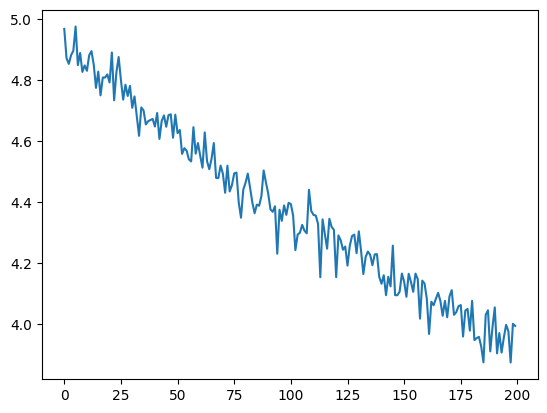

In [126]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

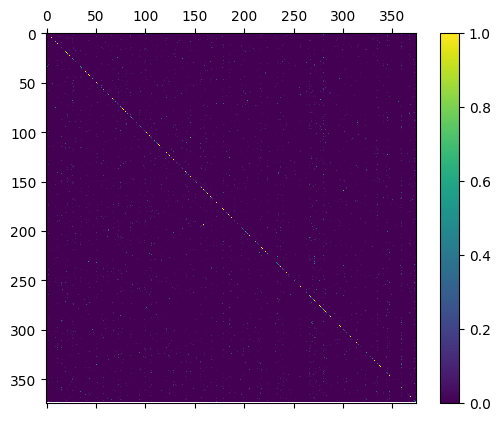

In [129]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(question_tensor):
    hidden = rnn.initHidden()

    for i in range(question_tensor.size()[0]):
        output, hidden = rnn(question_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, question, category_tensor, question_tensor = randomTrainingExample()
    output = evaluate(question_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# sphinx_gallery_thumbnail_number = 2
plt.show()

#note: sok a tag, szóval az még TODO hogy olvasható is legyen